In [1]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import matplotlib.pyplot as plt
import os

os.chdir("/Users/jakeblumengarten/git_repository/nfl_analysis")

In [2]:

# Load play-by-play data for 2020
pbp_py = nfl.import_pbp_data([2024])
pbp_py.to_csv("2024.csv", index=False)

# Filter for games where Chicago is the home team
season24 = pd.read_csv('2024.csv', low_memory = False)
chicago = season24.query("posteam == 'CHI'")

# Select only the columns you want
chicago_games = chicago[["week", "yards_gained"]]

# Save to CSV
chicago_games.to_csv("chicago_yards_by_week.csv", index=False)

2024 done.
Downcasting floats.


## Yards By Week

In [3]:

## Aggregate for the total yards for each game
chicago_agg = chicago_games.groupby("week", as_index = False).agg(
        total_yards_gained = ("yards_gained", "sum")
)

weeks = chicago_agg["week"]
yardspg = chicago_agg["total_yards_gained"]
print(chicago_agg.head())

   week  total_yards_gained
0     1               150.0
1     2               205.0
2     3               395.0
3     4               264.0
4     5               424.0


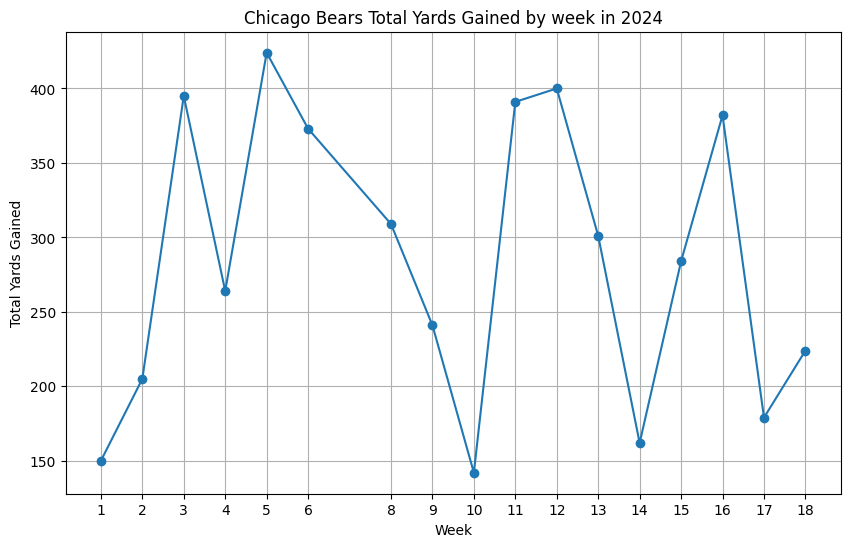

In [4]:

plt.figure(figsize = (10, 6))
plt.plot(weeks, yardspg, marker = 'o')
plt.title("Chicago Bears Total Yards Gained by week in 2024")
plt.xlabel("Week")
plt.ylabel("Total Yards Gained")
plt.grid(True)
plt.xticks(weeks)

# plt.savefig("chicago_yards_by_week.png")
plt.show()

## 